# ETALA-eksamen-2014

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

sp.init_printing()

def sp_to_np(matrix):
    return np.array(matrix.tolist()).astype(float)

def np_to_sp(matrix):
    return sp.Matrix(matrix)

def draw(points, adjancency):
    for i, col in enumerate(np.transpose(adjancency)):
        for j, row in enumerate(col):
            if row == 1:
                x_start, y_start, ex = points[i,:].T
                x_end, y_end, ex = points[j,:].T
                path = np.array([
                    [x_start, y_start],
                    [x_end, y_end]
                ])
                x, y = path.T
                plt.plot(x,y, color="blue")
                
def translate(points, transform):
    print("Points * transposed(Transform)")
    return points @ transform.T

## Opgave 1

In [2]:
x1 = sp.Matrix([
    1,2,1
])

x2 = sp.Matrix([
    1,1,0
])

x3 = sp.Matrix([
    -1,-1,3
])

b = sp.Matrix([
    -3,-1,11
])

A = x1.row_join(x2).row_join(x3)
A

⎡1  1  -1⎤
⎢        ⎥
⎢2  1  -1⎥
⎢        ⎥
⎣1  0  3 ⎦

In [3]:
# 1

Ab = A.row_join(b)
Ab

⎡1  1  -1  -3⎤
⎢            ⎥
⎢2  1  -1  -1⎥
⎢            ⎥
⎣1  0  3   11⎦

In [7]:
Ab.rref()[0]

⎡1  0  0  2 ⎤
⎢           ⎥
⎢0  1  0  -2⎥
⎢           ⎥
⎣0  0  1  3 ⎦

In [8]:
# 2

$$
\begin{aligned}
B^3B(B^{-1})^TB^{-1}BB^T(BB)B^{-1}(B^{-1})^2 \\
B^3B(B^{-1})^TB^T(BB)B^{-1}(B^{-1})^2 \\
B^3B(B^{T})^{-1}B^T(BB)B^{-1}(B^{-1})^2 \\
B^3B(BB)B^{-1}(B^{-1})^2 \\
B^6(B^{-1})^3 \\
B^3
\end{aligned}
$$

# Opgave 2

In [10]:
q = sp.symbols("q")

A = sp.Matrix([
    [1, q],
    [4, 2]
])
A

⎡1  q⎤
⎢    ⎥
⎣4  2⎦

In [27]:
# 1

eigenvals = list(A.eigenvals())
eigenvals

In [32]:
# 2

lambd = 5

list(sp.solveset(sp.Eq(eigenvals[1], lambd), q))[0] # q=

# Opgave 3

1. False, as $A\frac12c = 2b \iff \frac12Ac = 2b$ with $Ac = b$ becomes $\frac12b = 2b$
2. False, 

In [33]:
A = np.array([[1,2],[2,3]])
np.linalg.eigvals(A)

array([-0.23606798,  4.23606798])

2. Which is an indefinite result
3. False two vectors doesn't have to be orthogonal ($a^Tb = 0$) to be linear independent. 

# Opgave 4

In [47]:
# 1

x, a0, a1, a2, a3 = sp.symbols("x, a_0, a_1, a_2, a_3")

fx1 = sp.Eq(a0+a1*x+a2*x**2+a3*x**3, 3)
fx1

In [48]:
fx3 = sp.Eq(a0+a1*x+a2*x**2+a3*x**3, 2)
fx3

In [57]:
sp.Derivative(fx1.lhs, x)

In [84]:
fx1.subs(x, 1)

In [85]:
fx3.subs(x, 3)

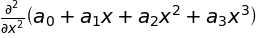

In [58]:
sp.Derivative(fx3.lhs, x, x)

In [88]:
sp.Eq(sp.Derivative(fx1.lhs, x).doit(), 3).subs(x, 1)

In [89]:
sp.expand(sp.Eq(sp.Derivative(fx1.lhs, x, x).doit(), -1)).subs(x, 2)

In [92]:
Ab = sp.Matrix([
    [1,1,1,1,3],
    [1,3,9,27,2],
    [0,1,2,3,3],
    [0,0,2,12,-1]
])

Ab.rref()[0].evalf()

⎡1.0   0    0    0   -5.5 ⎤
⎢                         ⎥
⎢ 0   1.0   0    0   15.25⎥
⎢                         ⎥
⎢ 0    0   1.0   0   -8.0 ⎥
⎢                         ⎥
⎣ 0    0    0   1.0  1.25 ⎦

In [93]:
fx = -5.5 + 15.25*x-8*x**2 + 1.25*x**3
fx

## Opgave 5

In [119]:
A = sp.Matrix([
    [2,1],
    [2,0],
    [1,1]
])

b = sp.Matrix([1,-2,2])

a1 = sp_to_np(A.col(0))
a2 = sp_to_np(A.col(1))

q1 = a1

q2 = a2 - np.sum(a2 * q1)/np.sum(q1 * q1)*q1
q2

array([[ 0.33333333],
       [-0.66666667],
       [ 0.66666667]])

In [177]:
q1_n = q1 / np.linalg.norm(q1)
q1_n

array([[0.66666667],
       [0.66666667],
       [0.33333333]])

In [178]:
Q = np.array([q1_n[:,0], q2[:,0]]).T
Q

array([[ 0.66666667,  0.33333333],
       [ 0.66666667, -0.66666667],
       [ 0.33333333,  0.66666667]])

In [179]:
A = sp_to_np(A)
b = sp_to_np(b)

In [180]:
# A = Q*R
# R = Q^T*A
R = (Q.T@A).round()
R.round()

array([[3., 1.],
       [0., 1.]])

In [183]:
# Ax = b
# QRx = b
# Q^TQRx = Q^Tb
# Rx = Q^Tb
QTb = np_to_sp(Q.T@b)
QTb
RQtb =  np_to_sp(R).row_join(QTb)
RQtb

⎡3.0  1.0  0.0⎤
⎢             ⎥
⎣0.0  1.0  3.0⎦

In [185]:
RQtb.rref()[0]

⎡ 1   0  -1.0⎤
⎢            ⎥
⎣0.0  1  3.0 ⎦

In [186]:
x = sp.Matrix([-1,3])
x

⎡-1⎤
⎢  ⎥
⎣3 ⎦

In [187]:
# Is the solution

In [188]:
A*x

⎡1.0 ⎤
⎢    ⎥
⎢-2.0⎥
⎢    ⎥
⎣2.0 ⎦

## Opgave 6

In [189]:
# 1

x = sp.Matrix([1,1,-1])
y = sp.Matrix([2,-1,3])

In [202]:
x1,x2,x3 = sp.symbols("x_1, x_2, x_3")
y1,y2,y3 = sp.symbols("y_1, y_2, y_3")

xy_ip = 3*x1*y1+2*x2*y2+x3*y3
xy_ip

In [204]:
# xy inner product

xy_ip.subs({
    x1: x[0],
    x2: x[1],
    x3: x[2],
    y1: y[0],
    y2: y[1],
    y3: y[2],
})

In [215]:
# distance (x)

xx_ip = 3*x1**2+2*x2**2+x3**2
xx_ip

sp.sqrt(xx_ip.subs({
    x1: x[0],
    x2: x[1],
    x3: x[2],
    y1: y[0],
    y2: y[1],
    y3: y[2],
    })
).evalf()

In [218]:
# distance (x y)

xy_dist = x-y
xy_dist

⎡-1⎤
⎢  ⎥
⎢2 ⎥
⎢  ⎥
⎣-4⎦

In [222]:
sp.sqrt(
    xx_ip.subs({
        x1: xy_dist[0],
        x2: xy_dist[1],
        x3: xy_dist[2],
        y1: xy_dist[0],
        y2: xy_dist[1],
        y3: xy_dist[2],
    })
).evalf()

In [229]:
# 2

y_dist = sp.sqrt(
    xx_ip.subs({
        x1: y[0],
        x2: y[1],
        x3: y[2],
        y1: y[0],
        y2: y[1],
        y3: y[2],
    })
)
y_dist.evalf()

In [230]:
xpy_dist = x+y
xpy_dist

⎡3⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣2⎦

In [231]:
xpy_dist = sp.sqrt(
    xx_ip.subs({
        x1: xpy_dist[0],
        x2: xpy_dist[1],
        x3: xpy_dist[2],
        y1: xpy_dist[0],
        y2: xpy_dist[1],
        y3: xpy_dist[2],
    })
)
xpy_dist.evalf()

In [233]:
y_dist < xpy_dist

In [234]:
# it holds